# Official Information

- [Website](https://matplotlib.org/)
- [PyPI](https://pypi.org/project/matplotlib/)
- [Cheatsheet](https://github.com/matplotlib/cheatsheets/)
- [Documentation](https://matplotlib.org/contents.html#)
- [Pyplot Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot)
- [Tutorials](https://matplotlib.org/tutorials/index.html)

# Overview

Matplotlib is a library built for plotting data inspired by Matlab.
However, let's first go over some important concepts to make matplotlib much clearer, through some general tips and common misconceptions when using this module.

# General Tips

## Importing

Just as numpy's conventional import is to rename it `np`, the import for matplotlib is usually the module pyplot, renamed as `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Magic explained later on this chapter
plt.style.use('seaborn')  # Changes the style to a more updated one

(-1.25, 1.15)

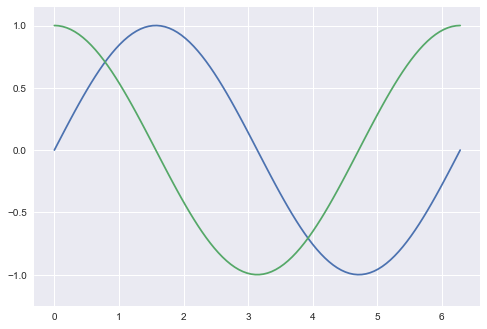

In [3]:
x = np.linspace(0, 2 * np.pi, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.ylim([-1.25, 1.15])

## Different contexts require different approaches

There are 3 main contexts when working with MatPlotLib: Within a script, an interactive shell or a notebook.
The key difference relates to when you want to visualize the data built. 

**TODO: Improv dis**


### Within a Script

When writing a script, the function `plt.show()` is key. This function starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures. This function is responsible for handling all the different backends that may be used.

```py
# A script file
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)

plt.plot(x, np.sin(x))
plt.show()
```

When executing this script, `plt.show()` will open one interactive window with the plotted graphic.

**Warning:** `plt.show()` should be called once and only once per script, or to be precise, per Python session. While it may work, it falls outside the scope of MatPlotLib, as it may have undefined behaviour on some backends.

### Within IPython shell


The IPython shell can be a very versatile tool and is great for trying plots and costumizing the figures. All you need to do is run the magic `%matplotlib` once per kernel/session. Afterwards, whenever `plt.plot()` is called, a new window will pop-up with the graph.

```py
In [1]: %matplotlib
Using matplotlib backend: TkAgg    
```

You can then keep both the shell and the interactive window open and run more `plt` commands (such as changing the axis, title, legend, etc) and it should automatically update in the interactive window. If you ever need to force an update, you can use `plt.draw()` to force a redraw. As such, `plt.show()` should never have to be used in the shell.

*Note*: After closing the interactive window, the figure will reset, so do watch out not to accidentaly close it

### Within a Jupyter Notebook

The notebook runs on a browser (or vscode *wink*) and is how this workshop was written! Notebooks support both markdown and code execution, alonside HTML, mathematics, plots, rich media and more. The combination of all of these tools makes Jupyter a very popular and powerful tool.

Jupyter Notebooks also support the same `%matplotlib` magic, although it also supports two other modes:
- `%matplotlib notebook` allows the plots to be interactive, although it requires extra packages and extra javascript to run in the browser
- `%matplotlib inline` embeds the static image into the notebook itself

Throughout this workshop we will use predominantly `inline` mode.

## Saving Pictures to Disk

Sometimes saving a plot is required. As such, matplotlib provides the function `plt.savefig()` or `Figure.savefig()`. Using `plt.show()` is **not** required to save a figure to the disk.

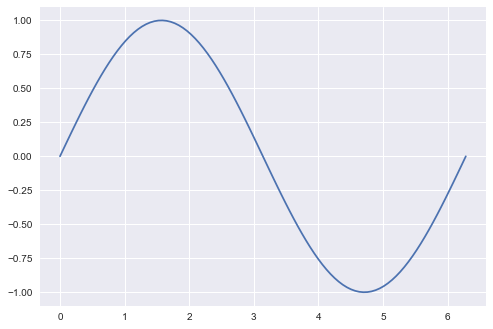

In [4]:
plt.plot(x, np.sin(x))
plt.savefig('my_plot.png')

To confirm that our plot was saved correctly, we can load it back into the notebook:

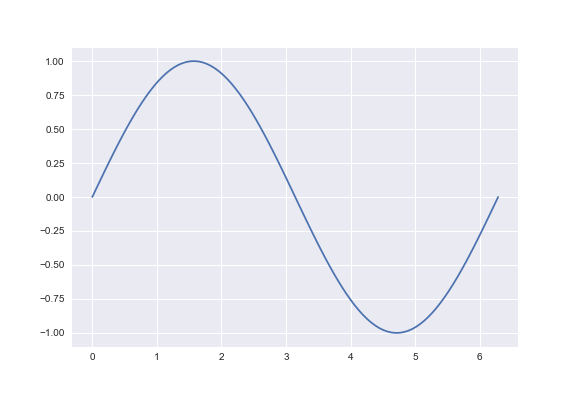

In [5]:
from IPython.display import Image
Image('my_plot.png')

The file type can be infered from the name or be passed explicitly in the `format` keyword argument. To check the available formats use the following code:

In [6]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

<Figure size 576x396 with 0 Axes>

# Styles

As you could see from our import statement, we have changed the style to 'seaborn', why would we want to do that?

Matplotlib's default style was based on Matlab, as such, its design can seem rather *old* compared to today's standards. Thankfully, matplotlib comes with various default styles to choose from that eiter improve upon the design, sets dark mode features or emulate other popular plotting software. For a list of possible values on your machine, you can run the following code:

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In this workshop we will be using 'seaborn' as it gives a very modern feel to matplotlib and also plays well with the seaborn module for the purpose of consistency.

# Matplotlib: Matlab or Object-Oriented?

One of the most confusing issues regarding this library is the fact that it supports both matlab style declarative statements and a more 'traditional' object-oriented approach. However, there are key differences between using one or the other. This also means there are some discrepancies between using one style or the other, and will be covered throughout the workshop.
To demonstrate this point, we'll present the code required to do the same plot in both styles.

During this workshop we will be using both notations, depending on the one that fits the context more appropriately.

## Matlab style

The declarative nature of this style makes it extremely helpful for simple plots, however, once you need something more complicated, such as four tiled plots in the same figure or a very customized plot it starts to fall short.

In this style the matplotlib itself is responsible for keeping the state of the figure and all the code we run. This makes it unsuited for some tasks when mixing in other modules such as pandas later on.

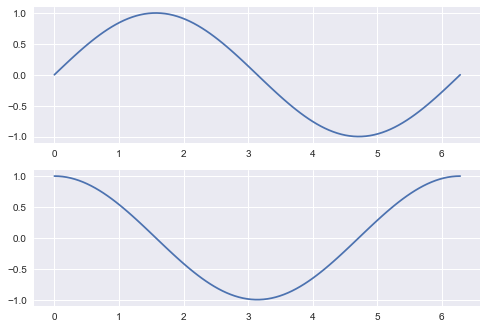

In [7]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

## Object-oriented style

Based on the actual internal structure of matploblib and the style of pythonic programming. This makes this style excel in very complex tasks and more consistent code when used alongside other libraries.

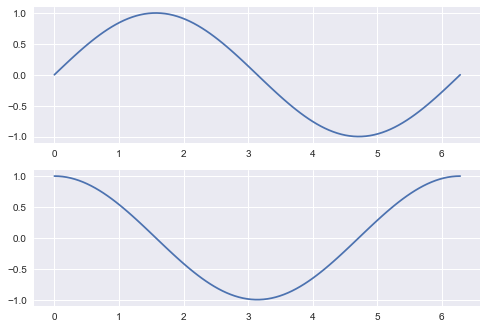

In [8]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));